# Homework 7, Part One: Lots and lots of questions about beer

### Do your importing and your setup

In [1]:
import pandas as pd

In [2]:
# now we can see all the rows in the dataframe, not just the first an the last few
# pd.set_option('display.max_rows', 30)
# pd.set_option('display.max_rows', None)

## Read in the file `craftcans.csv`, and look at the first first rows

In [3]:
df = pd.read_csv("craftcans.csv", na_values=["Does not apply"])
df.head()


,Beer,Brewery,Location,Style,Size,ABV,IBUs
0,Get Together,NorthGate Brewing,"Minneapolis, MN",American IPA,16 oz.,4.50%,50.0
1,Maggie's Leap,NorthGate Brewing,"Minneapolis, MN",Milk / Sweet Stout,16 oz.,4.90%,26.0
2,Wall's End,NorthGate Brewing,"Minneapolis, MN",English Brown Ale,16 oz.,4.80%,19.0
3,Pumpion,NorthGate Brewing,"Minneapolis, MN",Pumpkin Ale,16 oz.,6.00%,38.0
4,Stronghold,NorthGate Brewing,"Minneapolis, MN",American Porter,16 oz.,6.00%,25.0


## How many rows do you have in the data? What are the column types?

In [4]:
rows = len(df.axes[0])
print(f"There are {rows} rows in this data.")

There are 2416 rows in this data.


In [5]:
print(f"These are the data types of each column:")
df.dtypes 

These are the data types of each column:


Beer         object
Brewery      object
Location     object
Style        object
Size         object
ABV          object
IBUs        float64
dtype: object

# Checking out our alcohol

## What are the top 10 producers in terms of different cans of beer?

In [6]:
df.keys()

Index(['Beer', 'Brewery', 'Location', 'Style', 'Size', 'ABV', 'IBUs'], dtype='object')

In [7]:
df["Brewery"].value_counts().head(10)


Brewery
Brewery Vivant                62
Oskar Blues Brewery           46
Sun King Brewing Company      38
Cigar City Brewing Company    25
Sixpoint Craft Ales           24
Hopworks Urban Brewery        23
Stevens Point Brewery         22
Great Crescent Brewery        20
21st Amendment Brewery        20
Bonfire Brewing Company       19
Name: count, dtype: int64

## What is the most common ABV? (alcohol by volume)

In [8]:
df["ABV"].value_counts().head(1)

ABV
5.00%    215
Name: count, dtype: int64

## Oh, weird, ABV isn't a number. Convert it to a number for me, please.

It's going to take a few steps!

### First, let's just look at the ABV column by itself

In [9]:
df["ABV"]

0       4.50%
1       4.90%
2       4.80%
3       6.00%
4       6.00%
        ...  
2411    5.30%
2412    9.90%
2413    8.00%
2414    8.70%
2415    6.50%
Name: ABV, Length: 2416, dtype: object

### Hm, `%` isn't part of  a number. Let's remove it.

When you're confident you got it right, save the results back into the `ABV` column.

- *Tip: In programming the easiest way to remove something is to *replacing it with nothing*.*
- *Tip: "nothing" might seem like `NaN` sinc we talked about it a lot in class, but in this case it isn't! It's just an empty string, like ""*
- *Tip: `.replace` is used for replacing ENTIRE cells, while `.str.replace` is useful for replacing PARTS of cells (see my New York example)*

In [10]:
df["ABV"] = df["ABV"].str.replace("%", "")
df["ABV"]

0       4.50
1       4.90
2       4.80
3       6.00
4       6.00
        ... 
2411    5.30
2412    9.90
2413    8.00
2414    8.70
2415    6.50
Name: ABV, Length: 2416, dtype: object

### Now let's turn `ABV` into a numeric data type

Save the results back into the `ABV` column (again), and then check `df.dtypes` to make sure it worked.

- *Tip: We used `.astype(int)` during class, but this has a decimal in it...*

In [11]:
df["ABV"] = df["ABV"].str.replace("%", "").astype(float)
df["ABV"]

0       4.5
1       4.9
2       4.8
3       6.0
4       6.0
       ... 
2411    5.3
2412    9.9
2413    8.0
2414    8.7
2415    6.5
Name: ABV, Length: 2416, dtype: float64

In [12]:
df.dtypes

Beer         object
Brewery      object
Location     object
Style        object
Size         object
ABV         float64
IBUs        float64
dtype: object

## What's the ABV of the average beer look like?

### Show me in two different ways: one command to show the `median`/`mean`/etc, and secondly show me a chart

In [13]:
round(df["ABV"].mean(),2)


5.98

In [14]:
df["ABV"].median()

5.6

In [15]:
import pandas as pd 
%matplotlib inline

<Axes: title={'center': 'ABV'}, ylabel='Frequency'>

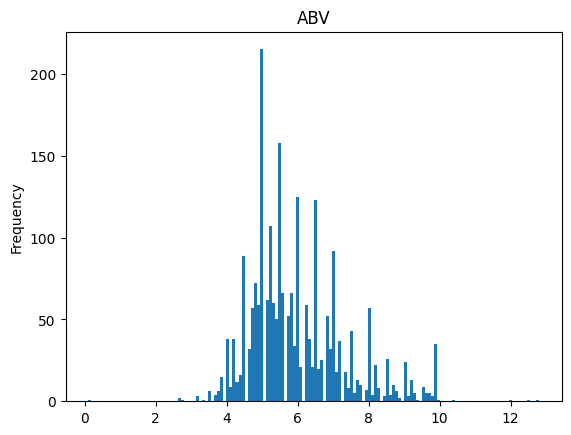

In [16]:
df["ABV"].plot(kind="hist", bins=150, title="ABV")


### We don't have ABV for all of the beers, how many are we missing them from?

- *Tip: You can use `isnull()` or `notnull()` to see where a column is missing data.*
- *Tip: You just want to count how many `True`s and `False`s there are.*
- *Tip: What does `.sum()` do when you have trues and falses? What about `.value_counts()`?*

In [17]:
no_ABV = df["ABV"].isnull().sum()
print(f" For {no_ABV} beers we have no ABV-results.")

 For 68 beers we have no ABV-results.


In [18]:
df["ABV"].notnull().sum()

2348

In [19]:
#1 line of code gives you both values
df["ABV"].isnull().value_counts()

ABV
False    2348
True       68
Name: count, dtype: int64

# Looking at location

Brooklyn used to produce 80% of the country's beer! Let's see if it's still true.

## What are the top 10 cities in the US for canned craft beer?

In [20]:
df["Location"].value_counts().head(10)

Location
Grand Rapids, MI    66
Chicago, IL         55
Portland, OR        52
Indianapolis, IN    43
San Diego, CA       42
Boulder, CO         41
Denver, CO          40
Brooklyn, NY        38
Seattle, WA         35
Longmont, CO        33
Name: count, dtype: int64

## List all of the beer from Brooklyn, NY

In [21]:
df[df["Location"]=="Brooklyn, NY"]


,Beer,Brewery,Location,Style,Size,ABV,IBUs
115,4Beans,Sixpoint Craft Ales,"Brooklyn, NY",Baltic Porter,12 oz.,10.0,52.0
210,Jammer,Sixpoint Craft Ales,"Brooklyn, NY",Gose,12 oz. Slimline,4.2,16.0
246,Abigale,Sixpoint Craft Ales,"Brooklyn, NY",Belgian Pale Ale,12 oz.,8.0,NaN
404,Nomader Weiss,Evil Twin Brewing,"Brooklyn, NY",Berliner Weissbier,12 oz.,4.0,NaN
421,Rad,Sixpoint Craft Ales,"Brooklyn, NY",Fruit / Vegetable Beer,16 oz.,3.2,7.0
439,Molotov Lite,Evil Twin Brewing,"Brooklyn, NY",American Double / Imperial IPA,16 oz.,8.5,NaN
588,Bengali,Sixpoint Craft Ales,"Brooklyn, NY",American IPA,"24 oz. ""Silo Can""",6.5,62.0
713,Sensi Harvest,Sixpoint Craft Ales,"Brooklyn, NY",American Pale Ale (APA),12 oz.,4.7,50.0
969,Hi-Res,Sixpoint Craft Ales,"Brooklyn, NY",American Double / Imperial IPA,12 oz.,9.9,111.0
987,KelSo Nut Brown Lager,KelSo Beer Company,"Brooklyn, NY",Euro Dark Lager,12 oz.,5.7,19.0


## What brewery in Brooklyn puts out the most different cans of beer?

In [22]:
df[df["Location"]=="Brooklyn, NY"]["Brewery"].value_counts().head(1)

Brewery
Sixpoint Craft Ales    24
Name: count, dtype: int64

## What are the five most common styles of beer produced by Sixpoint?

In [23]:
df[df["Brewery"]=="Sixpoint Craft Ales"]["Style"].value_counts().head(1)

Style
American IPA    4
Name: count, dtype: int64

## List all of the breweries in New York state.

- *Tip: We want to match *part* of the `Location` column, but not all of it.*
- *Tip: Watch out for `NaN` values! You might be close, but you'll need to pass an extra parameter to make it work without an error.*
- *Tip: If you want to be extra fancy, you can create a new column with just the state abbreviation and then filter on that.*

In [24]:
# 1. Step: Make a List 
df_NY = df[df["Location"].str.contains("NY", na=False)]
df_NY

,Beer,Brewery,Location,Style,Size,ABV,IBUs
115,4Beans,Sixpoint Craft Ales,"Brooklyn, NY",Baltic Porter,12 oz.,10.0,52.0
210,Jammer,Sixpoint Craft Ales,"Brooklyn, NY",Gose,12 oz. Slimline,4.2,16.0
246,Abigale,Sixpoint Craft Ales,"Brooklyn, NY",Belgian Pale Ale,12 oz.,8.0,NaN
404,Nomader Weiss,Evil Twin Brewing,"Brooklyn, NY",Berliner Weissbier,12 oz.,4.0,NaN
421,Rad,Sixpoint Craft Ales,"Brooklyn, NY",Fruit / Vegetable Beer,16 oz.,3.2,7.0
...,...,...,...,...,...,...,...
2351,Brooklyn Lager (12 oz.),Brooklyn Brewery,"Brooklyn, NY",American Amber / Red Lager,12 oz.,5.2,NaN
2364,Heinnieweisse Weissebier,Butternuts Beer and Ale,"Garrattsville, NY",Hefeweizen,12 oz.,4.9,NaN
2365,Snapperhead IPA,Butternuts Beer and Ale,"Garrattsville, NY",American IPA,12 oz.,6.8,NaN
2366,Moo Thunder Stout,Butternuts Beer and Ale,"Garrattsville, NY",Milk / Sweet Stout,12 oz.,4.9,NaN


In [25]:
# 2. Step: unique() um jede Brewery nur 1x zu bekommen
df_NY["Brewery"].unique()


array(['Sixpoint Craft Ales', 'Evil Twin Brewing', 'Chatham Brewing',
       'Newburgh Brewing Company', 'Southampton Publick House',
       'Montauk Brewing Company', 'Matt Brewing Company',
       'The Bronx Brewery', 'KelSo Beer Company', 'Brooklyn Brewery',
       'The Manhattan Brewing Company', 'Blue Point Brewing Company',
       'Bomb Beer Company', 'Dundee Brewing Company',
       'Upstate Brewing Company', 'Butternuts Beer and Ale'], dtype=object)

In [26]:
# 3. Step: len(), weil es eine liste ist 
brew_ny =len(df_NY["Brewery"].unique())
print(f"There are {brew_ny} Breweries in the State of NY.")

There are 16 Breweries in the State of NY.


# Measuring International Bitterness Units

## Display all of the IPAs

Include American IPAs, Imperial IPAs, and anything else with "IPA in it."

IPA stands for [India Pale Ale](https://www.bonappetit.com/story/ipa-beer-styles), and is probably the most popular kind of beer in the US for people who are drinking [craft beer](https://www.craftbeer.com/beer/what-is-craft-beer).

In [27]:
df_IPA = df[df["Style"].str.contains("IPA", na=False)]
df_IPA

,Beer,Brewery,Location,Style,Size,ABV,IBUs
0,Get Together,NorthGate Brewing,"Minneapolis, MN",American IPA,16 oz.,4.5,50.0
6,Citra Ass Down,Against the Grain Brewery,"Louisville, KY",American Double / Imperial IPA,16 oz.,8.0,68.0
14,Rico Sauvin,Against the Grain Brewery,"Louisville, KY",American Double / Imperial IPA,16 oz.,7.6,68.0
17,Pile of Face,Against the Grain Brewery,"Louisville, KY",American IPA,16 oz.,6.0,65.0
24,Habitus (2014),Mike Hess Brewing Company,"San Diego, CA",American Double / Imperial IPA,16 oz.,8.0,100.0
...,...,...,...,...,...,...,...
2403,Abrasive Ale,Surly Brewing Company,"Brooklyn Center, MN",American Double / Imperial IPA,16 oz.,9.7,120.0
2406,Furious,Surly Brewing Company,"Brooklyn Center, MN",American IPA,16 oz.,6.2,99.0
2408,Brew Free! or Die IPA,21st Amendment Brewery,"San Francisco, CA",American IPA,12 oz.,7.0,65.0
2412,GUBNA Imperial IPA,Oskar Blues Brewery,"Longmont, CO",American Double / Imperial IPA,12 oz.,9.9,100.0


IPAs are usually pretty hoppy and bitter. IBU stands for [International Bitterness Unit](http://www.thebrewenthusiast.com/ibus/), and while a lot of places like to brag about having the most bitter beer (it's an American thing!), IBUs don't necessary *mean anything*.

Let's look at how different beers have different IBU measurements.

## Try to get the average IBU measurement across all beers

In [28]:
# IBUs is a string - we have to convert it into int/float 
df.dtypes

Beer         object
Brewery      object
Location     object
Style        object
Size         object
ABV         float64
IBUs        float64
dtype: object

In [29]:
# First time it didn't work, because there were missing values in the Data which said "Does not apply"
# So we went up to Cell [2] and edited  
    # df = pd.read_csv("craftcans.csv", na_values=["Does not apply"])
    # df.head()
# result: whenever the Data says "Does not apply" the program converts it to NaN  
# we ran the whole code again and then it worked

df["IBUs"] = df["IBUs"].astype(float)

### Oh no, it doesn't work!

It looks like some of those values *aren't numbers*. There are two ways to fix this:

- *Tip: If you use [`na_values=`](http://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.read_csv.html). be sure to go add it up top and run all of your cells again. You can also use `.replace` but I don't think that's as good of an idea.*
- *Tip: Make sure you're giving `na_values=` a LIST, not just a string*

### Now try to get the average IBUs again

In [30]:
# round(,2) to round it with 2 decimal places
round(df["IBUs"].mean(),2)

42.71

## Draw the distribution of IBU measurements, but with *twenty* bins instead of the default of 10

- *Tip: Every time I ask for a distribution, I'm looking for a histogram*

<Axes: title={'center': 'IBUs'}, ylabel='Frequency'>

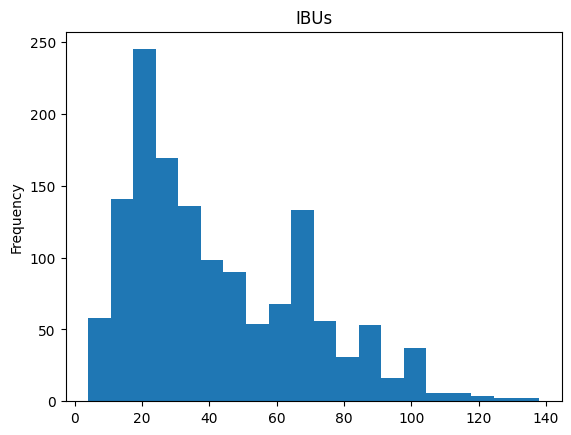

In [31]:
df["IBUs"].plot(kind="hist", bins=20, title= "IBUs" )

## Hm, Interesting distribution. List all of the beers with IBUs above the 75th percentile

- *Tip: There's a single command that gives you the 25/50/75th percentile*
- *Tip: You can just manually type the number when you list those beers*

In [32]:
# 1. Step: filter in IBUs: I only look at IBUs df[df["IBUs"]
# 2. Step: we want the 75th percentile >df["IBUs"].quantile(0.75)]
# 3. Step: we want the name of the beers 
df[df["IBUs"]>df["IBUs"].quantile(0.75)]["Beer"]

6                Citra Ass Down
7                London Balling
14                  Rico Sauvin
17                 Pile of Face
21                   Excess IPL
                 ...           
2408      Brew Free! or Die IPA
2410    Ten Fidy Imperial Stout
2412         GUBNA Imperial IPA
2414          Gordon Ale (2009)
2415            Dale's Pale Ale
Name: Beer, Length: 346, dtype: object

In [33]:
#  just to check the results 
df[df["IBUs"]>df["IBUs"].quantile(0.75)]["Beer"].value_counts().sum()


346

## List all of the beers with IBUs below the 25th percentile

In [34]:
df[df["IBUs"]<df["IBUs"].quantile(0.25)]["Beer"]


2                          Wall's End
12                           Sho'nuff
13                        Bloody Show
18                     The Brown Note
19                        House Lager
                    ...              
2372                 Bombshell Blonde
2385              Bikini Blonde Lager
2396                 Royal Weisse Ale
2404                             Hell
2409    Hell or High Watermelon Wheat
Name: Beer, Length: 338, dtype: object

In [35]:
#  just to check the results 
df[df["IBUs"]<df["IBUs"].quantile(0.25)]["Beer"].count()

338

## List the median IBUs of each type of beer. Graph it.

Put the highest at the top, and the missing ones at the bottom.

- Tip: Look at the options for `sort_values` to figure out the `NaN` thing. The `?` probably won't help you here.

In [36]:
# 1. Step: groupby in different Styles 
# 2. Step: we want the median of IBUs 
# 3. Step: # round(,2) to round it with 2 decimal places
round(df.groupby("Style")["IBUs"].median())

Style
Abbey Single Ale              22.0
Altbier                       36.0
American Adjunct Lager         9.0
American Amber / Red Ale      31.0
American Amber / Red Lager    23.0
                              ... 
Tripel                        28.0
Vienna Lager                  24.0
Wheat Ale                     24.0
Winter Warmer                 22.0
Witbier                       16.0
Name: IBUs, Length: 99, dtype: float64

In [37]:
# Step 2: sort it!
df.groupby("Style")["IBUs"].median().sort_values(ascending=False).head(5)

Style
American Barleywine                   96.0
Russian Imperial Stout                94.0
American Double / Imperial IPA        91.0
American Double / Imperial Pilsner    85.0
American Black Ale                    73.0
Name: IBUs, dtype: float64

In [38]:
# we have cells with NaN - they are at the bottom of the table 
df.groupby("Style")["IBUs"].median().sort_values(ascending=False).tail(5)

Style
Kristalweizen      NaN
Low Alcohol Beer   NaN
Mead               NaN
Rauchbier          NaN
Shandy             NaN
Name: IBUs, dtype: float64

In [39]:
# if we want to get the 5 beer-styles with the lowest IBU we have to find another way
df.groupby("Style")["IBUs"].median().sort_values(ascending=True).head(5)

Style
Berliner Weissbier         8.0
American Adjunct Lager     9.0
Gose                      10.0
Light Lager               12.0
Hefeweizen                15.0
Name: IBUs, dtype: float64

<Axes: title={'center': 'Median IBU in different Styles of beer'}, ylabel='Frequency'>

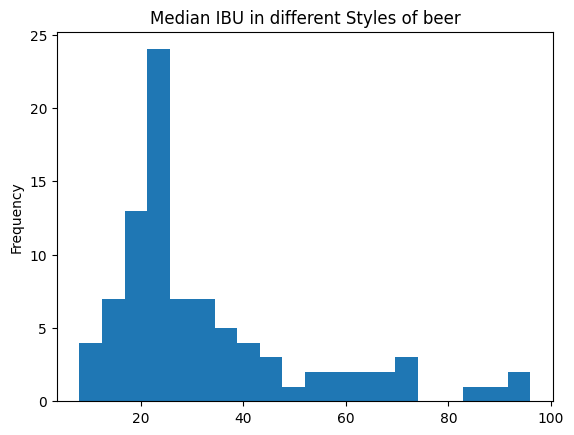

In [40]:
df.groupby("Style")["IBUs"].median().plot(kind="hist", bins=20, title = "Median IBU in different Styles of beer")

## Hmmmm, it looks like they are generally different styles. What are the most common 5 styles of high-IBU beer vs. low-IBU beer?

- *Tip: You'll want to think about it in three pieces - filtering to only find the specific beers beers, then finding out what the most common styles are, then getting the top 5.*
- *Tip: You CANNOT do this in one command. It's going to be one command for the high and one for the low.*
- *Tip: "High IBU" means higher than 75th percentile, "Low IBU" is under 25th percentile*

In [41]:
df_high = df[df["IBUs"]>df["IBUs"].quantile(0.75)]
df_low = df[df["IBUs"]<df["IBUs"].quantile(0.25)]

In [42]:
df_high

,Beer,Brewery,Location,Style,Size,ABV,IBUs
6,Citra Ass Down,Against the Grain Brewery,"Louisville, KY",American Double / Imperial IPA,16 oz.,8.0,68.0
7,London Balling,Against the Grain Brewery,"Louisville, KY",English Barleywine,16 oz.,12.5,80.0
14,Rico Sauvin,Against the Grain Brewery,"Louisville, KY",American Double / Imperial IPA,16 oz.,7.6,68.0
17,Pile of Face,Against the Grain Brewery,"Louisville, KY",American IPA,16 oz.,6.0,65.0
21,Excess IPL,Jack's Abby Craft Lagers,"Framingham, MA",American India Pale Lager,16 oz.,7.2,80.0
...,...,...,...,...,...,...,...
2408,Brew Free! or Die IPA,21st Amendment Brewery,"San Francisco, CA",American IPA,12 oz.,7.0,65.0
2410,Ten Fidy Imperial Stout,Oskar Blues Brewery,"Longmont, CO",Russian Imperial Stout,12 oz.,9.9,98.0
2412,GUBNA Imperial IPA,Oskar Blues Brewery,"Longmont, CO",American Double / Imperial IPA,12 oz.,9.9,100.0
2414,Gordon Ale (2009),Oskar Blues Brewery,"Longmont, CO",American Double / Imperial IPA,12 oz.,8.7,85.0


In [43]:
# Version 1:
df_high["Style"].value_counts().sort_values(ascending=False).head(5)

Style
American IPA                      195
American Double / Imperial IPA     72
American Pale Ale (APA)            18
American Black Ale                 15
American Strong Ale                 9
Name: count, dtype: int64

In [44]:
# Version 2 (groupby)
df_high.groupby("Style")["Beer"].count().sort_values(ascending=False).head(5)

Style
American IPA                      195
American Double / Imperial IPA     72
American Pale Ale (APA)            18
American Black Ale                 15
American Strong Ale                 9
Name: Beer, dtype: int64

In [45]:
df_low["Style"].value_counts().sort_values(ascending=True).head(20)

Style
Tripel                       1
Dortmunder / Export Lager    1
Munich Dunkel Lager          1
English Pale Ale             1
Roggenbier                   1
American Stout               1
American Black Ale           1
Euro Dark Lager              1
Dubbel                       1
Radler                       1
Chile Beer                   1
Belgian Dark Ale             1
American Strong Ale          1
English Dark Mild Ale        1
Other                        1
Bock                         1
Altbier                      1
English Pale Mild Ale        1
Dunkelweizen                 2
Milk / Sweet Stout           2
Name: count, dtype: int64

In [46]:
df_low.groupby("Style")["Beer"].count().sort_values(ascending=True).head(20)

Style
Altbier                      1
Tripel                       1
Roggenbier                   1
Radler                       1
Other                        1
Munich Dunkel Lager          1
Euro Dark Lager              1
English Pale Mild Ale        1
English Dark Mild Ale        1
Dubbel                       1
Dortmunder / Export Lager    1
Chile Beer                   1
Bock                         1
Belgian Dark Ale             1
English Pale Ale             1
American Stout               1
American Black Ale           1
American Strong Ale          1
Rye Beer                     2
Milk / Sweet Stout           2
Name: Beer, dtype: int64

## Get the average IBU of "Witbier", "Hefeweizen" and "American Pale Wheat Ale" styles

I'm counting these as wheat beers. If you see any other wheat beer categories, feel free to include them. I want ONE measurement and ONE graph, not three separate ones. And 20 to 30 bins in the histogram, please.

- *Tip: I hope that `isin` is in your toolbox*

In [47]:
wheat = df[df["Style"].isin(["Hefeweizen", "Witbier", "American Pale Wheat Ale"])]
wheat.value_counts()


Beer                          Brewery                            Location         Style                    Size    ABV  IBUs
Nonstop Hef Hop               Hopworks Urban Brewery             Portland, OR     American Pale Wheat Ale  16 oz.  3.9  20.0    12
Morning Wood Wheat (Current)  Pug Ryan's Brewery                 Dillon, CO       American Pale Wheat Ale  12 oz.  5.9  14.0     2
312 Urban Wheat Ale           Goose Island Brewing Company       Chicago, IL      American Pale Wheat Ale  12 oz.  4.2  18.0     1
SanTan HefeWeizen (2010)      SanTan Brewing Company             Chandler, AZ     Hefeweizen               12 oz.  5.0  15.0     1
SummerBright Ale              Breckenridge Brewery               Denver, CO       American Pale Wheat Ale  12 oz.  4.5  15.0     1
                                                                                                                                ..
Honey Wheat                   Morgan Street Brewery              Saint Louis, MO  America

In [50]:
print(f"The average IBU of wheatbeer ist {wheat['IBUs'].mean():.2f} IBU.")

The average IBU of wheatbeer ist 18.98 IBU.


## Draw a histogram of the IBUs of those beers

<Axes: title={'center': 'Mean IBU in different wheatbeers'}, ylabel='Frequency'>

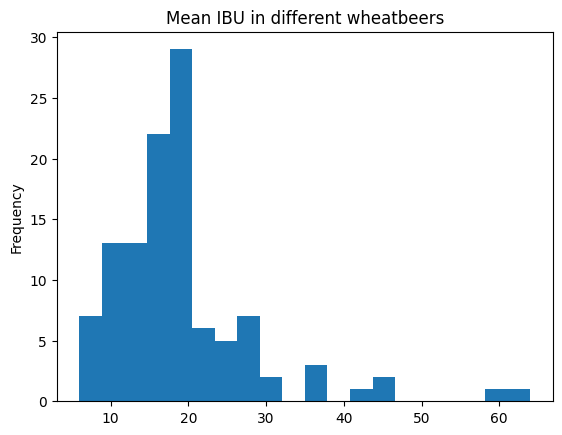

In [111]:
wheat['IBUs'].plot(kind="hist", bins= 20, title= "Mean IBU in different wheatbeers")

## Get the average IBU of any style with "IPA" in it (also draw a histogram)

In [62]:
import numpy as np

In [63]:
IPA = df[df["Style"].str.contains("IPA", na = False)]
IPA

,Beer,Brewery,Location,Style,Size,ABV,IBUs
0,Get Together,NorthGate Brewing,"Minneapolis, MN",American IPA,16 oz.,4.5,50.0
6,Citra Ass Down,Against the Grain Brewery,"Louisville, KY",American Double / Imperial IPA,16 oz.,8.0,68.0
14,Rico Sauvin,Against the Grain Brewery,"Louisville, KY",American Double / Imperial IPA,16 oz.,7.6,68.0
17,Pile of Face,Against the Grain Brewery,"Louisville, KY",American IPA,16 oz.,6.0,65.0
24,Habitus (2014),Mike Hess Brewing Company,"San Diego, CA",American Double / Imperial IPA,16 oz.,8.0,100.0
...,...,...,...,...,...,...,...
2403,Abrasive Ale,Surly Brewing Company,"Brooklyn Center, MN",American Double / Imperial IPA,16 oz.,9.7,120.0
2406,Furious,Surly Brewing Company,"Brooklyn Center, MN",American IPA,16 oz.,6.2,99.0
2408,Brew Free! or Die IPA,21st Amendment Brewery,"San Francisco, CA",American IPA,12 oz.,7.0,65.0
2412,GUBNA Imperial IPA,Oskar Blues Brewery,"Longmont, CO",American Double / Imperial IPA,12 oz.,9.9,100.0


In [76]:
meanIPA = IPA['IBUs'].mean()
print(f"The mean IBU of all IPAs is {meanIPA:.2f}.") 

The mean IBU of all IPAs isr 71.95.


In [75]:
totalIPA=IPA.groupby("Style")["IBUs"].mean()
totalIPA

Style
American Double / Imperial IPA    93.320000
American IPA                      67.634551
American White IPA                48.833333
Belgian IPA                       57.000000
English India Pale Ale (IPA)      54.714286
Name: IBUs, dtype: float64

In [103]:
import matplotlib.pyplot as plt

<Axes: title={'center': 'IBU in IPA-Styles'}, xlabel='Style'>

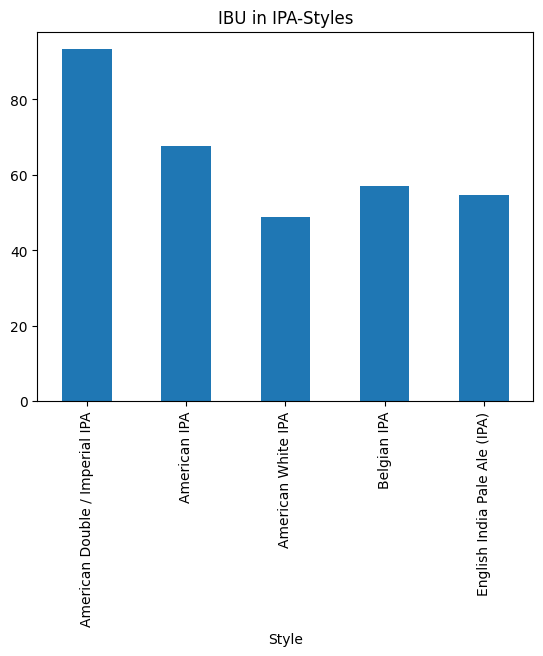

In [113]:
# barh = bar horicontal 
# bar = bar vertical 

totalIPA.plot(kind="bar", title="IBU in IPA-Styles")

<Axes: title={'center': 'IBU in IPA-Styles'}, ylabel='Style'>

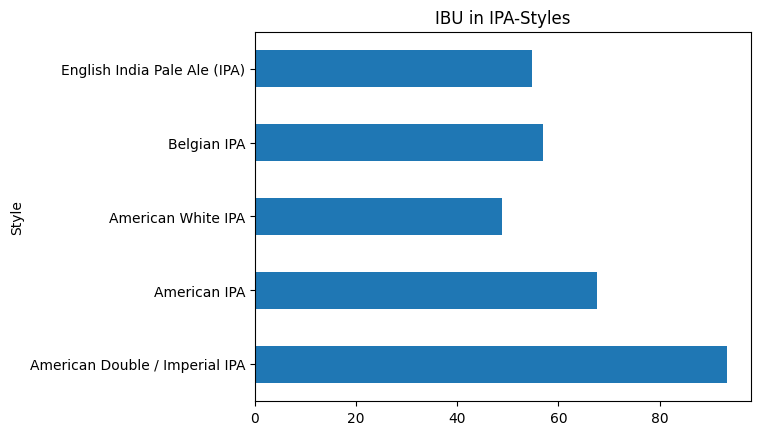

In [102]:
totalIPA.plot(kind="barh", title="IBU in IPA-Styles")

<Axes: title={'center': 'IBU in IPAs'}, ylabel='Frequency'>

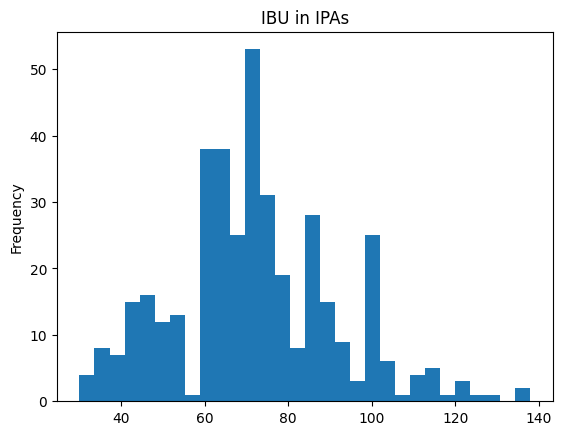

In [86]:
IPA["IBUs"].plot(kind="hist", bins=30, title="IBU in IPAs")

## Plot those two histograms in the same cell!

I swear the behavior of this changes every year. Does it make two charts? Does it overlap them in one?

<Axes: title={'center': 'IBU in wheatbeer(blue) and IPAs(orange)'}, ylabel='Frequency'>

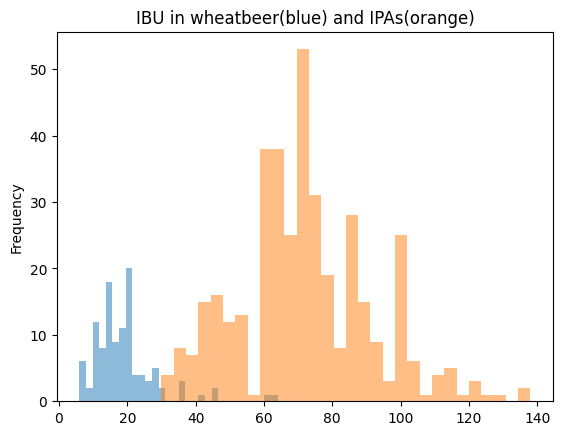

In [108]:
wheat['IBUs'].plot(kind="hist", bins= 30, alpha=0.5)
IPA["IBUs"].plot(kind="hist", bins=30, title="IBU in wheatbeer(blue) and IPAs(orange)", alpha=0.5)

## Compare the ABV of wheat beers vs. IPAs : their IBUs were really different, but how about their alcohol percentage?

Wheat beers might include witbier, hefeweizen, American Pale Wheat Ale, and anything else you think is wheaty. IPAs probably have "IPA" in their name.

In [ ]:
wheat = df[df["Style"].isin(["Hefeweizen", "Witbier", "American Pale Wheat Ale"])]
IPA = df[df["Style"].str.contains("IPA", na = False)

<Axes: title={'center': 'IBU in wheatbeer(blue) and IPAs(orange)'}, ylabel='Frequency'>

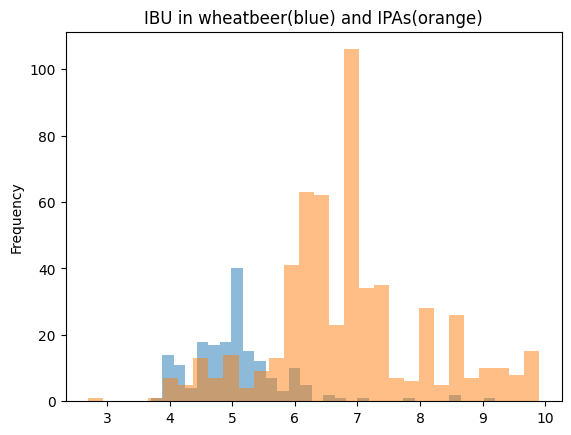

In [112]:
wheat["ABV"].plot(kind="hist", bins= 30, alpha=0.5)
IPA["ABV"].plot(kind="hist", bins=30, title="IBU in wheatbeer(blue) and IPAs(orange)", alpha=0.5)

## Good work!

In [ ]:
:-)